<a href="https://colab.research.google.com/github/jhonda18/Python2/blob/main/N4_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b>Técnicas computacionales en Python para Ciencias Económicas - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> ,  <a href="mailto:sergio.sanes@udea.edu.co"> ✉ Sergio Sanes </a>, <a href="mailto: mario.sucerquia@udea.edu.co"> ✉ Mario Sucerquia </a><br>
Versión actualizada: 3-Ago-2020
</div>

<br>

**El presente curso hace parte de la Facultad de Ciencias Económicas (FCE) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 3 horas los días martes y jueves por medio de Google meeting. Para un total de dedicación temporal de 32 horas. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns

In [ ]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 542kB 11.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=47401ea244b0834a83094a9f17faed888fd45eb8ffee1c9faec4a2df49bdbe65
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# **Resumen regresiones líneales**

Para los siguientes modelos, usaremos un dataset real de viviendas en Boston. El objetivo con este dataset consiste en predecir el valor medio de los precios de las casas en diferentes barrios de Boston en los 70s, mediante información como la tasa de asesinatos, proximidad al rio Charles, accesibilidad a las autopistas, etc. 

In [ ]:
# load_extended_boston
X, y = mglearn.datasets.load_extended_boston()
X.shape, y.shape

((506, 104), (506,))

* El dataset load_boston_extended consta de 506 instancias y 104 caracterísiticas.

* La creación de un modelo mediante `sklearn` se realiza mediante el módulo `linear_model`, importando el regresor que desee `from sklearn.linear_model import XXXX`

* Recuerde que en todos los casos se realiza el ajuste usando el método `fit()` el cual recibe como argumentos los datos de características $X$ y variable objetivo $y$ además de algunos hiperparámetros según el caso: 

1. `LinearRegression`
$$y=\sum_{i=0}^n w_ix_i$$
2. `Ridge`
Hiperparámetro $\alpha$:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$
3. `Lasso`
Hiperparámetro $\alpha$:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$
4. `ElasticNet` 
Hiperparámetro $\alpha$ y $\rho$:
$$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2. $$


In [ ]:
#Primero el split de los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape,X_test.shape

((379, 104), (127, 104))

In [ ]:
#Importar los regresores
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

In [ ]:
#Instanciar los regresores

models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
#model1 = LinearRegression()

In [ ]:
#Entrenamiento/Ajuste
for m in models:
  m.fit(X_train,y_train)

#model1.fit(X_train,y_train)

In [ ]:
#Revisión de los score/metricas/errores
labels = ['Regresión linear', 'Regresión Ridge alpha=1', 'Regresión Lasso alpha=1','Regresión ElasticNet alpha=1,rho=0.5']
for i,m in enumerate(models):
  print('Model', labels[i])
  print("Score train:", m.score(X_train, y_train))
  print("Score test:",m.score(X_test, y_test))
  y_pred = m.predict(X_test)
  print("MAE",metrics.mean_absolute_error(y_test,y_pred)/y_test.mean())
  print("RMSE:", metrics.mean_squared_error(y_test,y_pred)/y_test.mean())
  print()

Model Regresión linear
Score train: 0.9520519609032727
Score test: 0.6074721959665571
MAE 0.1446181269816706
RMSE: 1.4376717005334618

Model Regresión Ridge alpha=1
Score train: 0.8857966585170941
Score test: 0.7527683481744751
MAE 0.13281865234138446
RMSE: 0.9055102483273164

Model Regresión Lasso alpha=1
Score train: 0.29323768991114607
Score test: 0.20937503255272294
MAE 0.2460694432297761
RMSE: 2.8957417277307007

Model Regresión ElasticNet alpha=1,rho=0.5
Score train: 0.32837814485847916
Score test: 0.2217004367773664
MAE 0.24537727527462072
RMSE: 2.850598722141482



In [ ]:
#Ridge
model_select = [Ridge(alpha=0.1),Ridge(alpha=0.5)]
for i,m in enumerate(model_select):
  print('Ridge',i+1)
  m.fit(X_train,y_train)
  print("Score train:", m.score(X_train, y_train))
  print("Score test:",m.score(X_test, y_test))
  y_pred = m.predict(X_test)
  print("MAE",metrics.mean_absolute_error(y_test,y_pred)/y_test.mean())
  print("RMSE:", metrics.mean_squared_error(y_test,y_pred)/y_test.mean())
  print()

Ridge 1
Score train: 0.9282273685001992
Score test: 0.7722067936479818
MAE 0.13051808889945962
RMSE: 0.8343150293582103

Ridge 2
Score train: 0.9037403798627096
Score test: 0.7675638302587819
MAE 0.12982254149567968
RMSE: 0.8513203395621646



In [ ]:
#Ridge
model_select = [Ridge(alpha=1.5),Ridge(alpha=2.0)]
for i,m in enumerate(model_select):
  print('Ridge',i+1)
  m.fit(X_train,y_train)
  print("Score train:", m.score(X_train, y_train))
  print("Score test:",m.score(X_test, y_test))
  y_pred = m.predict(X_test)
  print("MAE",metrics.mean_absolute_error(y_test,y_pred)/y_test.mean())
  print("RMSE:", metrics.mean_squared_error(y_test,y_pred)/y_test.mean())
  print()

Ridge 1
Score train: 0.8725474616490907
Score test: 0.7397723744134674
MAE 0.13620179448670872
RMSE: 0.9531092808164503

Ridge 2
Score train: 0.8619066525203294
Score test: 0.728453141532512
MAE 0.1392781978635935
RMSE: 0.994567084868749



# **Estimador de densidad (Kenel Density Estimator)**

Un estimador de densidad es un algoritmo que busca modelar la distribución de probabilidad que generó un conjunto de datos. Un ejemplo de esto es el histograma: Cuando usamos histogramas utilizamos alguna forma de estimación de densidad. Es decir, aunque solo tenemos unos pocos puntos de datos discretos, asumimos que tenemos algún tipo de distribución continua, y nos gustaría saber cuál es esa distribución. 

Uno de los problemas con el uso de un histograma como estimador de densidad es que la elección del tamaño y ubicación de los bines puede conducir a representaciones que tienen características cualitativamente diferentes. En la siguiente figura se muestran dos histogramas diferentes para el mismo conjunto de datos: 

<p><img alt="Colaboratory logo" height="200px" src="https://i.imgur.com/XYrUsRT.png" align="left" hspace="10px" vspace="0px"></p>

A la izquierda, vemos una distribución bimodal. A la derecha, vemos una distribución unimodal con una cola larga. Probablemente no adivinaríamos que estos dos histogramas se crearon a partir de los mismos datos. Podemos pensar en un histograma como una pila de bloques, donde apilamos un bloque dentro de cada bin en la parte superior de cada punto del conjunto de datos:

<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/qcONTFT.png" align="left" hspace="10px" vspace="0px"></p>

El problema con este tipo de bineado se debe al hecho de que la altura de la pila de bloques a menudo no se refleja en la densidad real de los puntos cercanos, sino en las coincidencias de cómo se alinean los bins con los puntos de datos.

Pero, ¿qué pasa si, en lugar de apilar los bloques alineados con los bines, apilamos los bloques alineados con los puntos que representan? 

<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/cZTVtlQ.png" align="left" hspace="10px" vspace="0px"></p>

El resultado parece un poco desordenado, pero es un reflejo mucho más sólido de las características de los datos reales que el histograma estándar. Aún así, los bordes no son estéticamente agradables, ni reflejan ninguna propiedad verdadera de los datos. Para suavizarlos, podríamos decidir reemplazar los bloques en cada ubicación con una función suave, por ejemplo con una gaussiana:

<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/oWdQPJI.png" align="left" hspace="10px" vspace="0px"></p>



Esta gráfica suavizada, da una idea mucho más precisa de la forma de la distribución de los datos. 

## KDE en la práctica

Las dos últimas gráficas son ejemplos de KDE en una dimensión. La idea básica aquí es ubicar una distribución (kernel) $K$ sobre cada punto 

<p><img alt="Colaboratory logo" height="200px" src="https://i.imgur.com/isgKTAG.png" align="left" hspace="10px" vspace="0px"></p>

y sumar cada contribución para obtener una distribución de probabilidad $$f(x)=\frac{1}{N \cdot h}\displaystyle\sum_{i=1}^{N} k\left(\frac{x-x_i}{h}\right)$$

<p><img alt="Colaboratory logo" height="200px" src="https://i.imgur.com/iggiUXV.png" align="left" hspace="10px" vspace="0px"></p>

Los parámetros libres del KDE son:

- *kernel* $k$, que especifica la forma de la distribución ubicada en cada punto
- *ancho de banda* $h$ del kernel, que controla el tamaño del kernel en cada punto. 

La implementación del KDE mediante sklearn se hace a través del módulo `sklearn.neighbors` como `KernelDensity`:

In [ ]:
# Librerías
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [ ]:
# creamos una función para generar datos

def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

In [ ]:
(np.max(x)-np.min(x))/30, x.min(),x.max()

(0.3917229234728168, -2.79308500014654, 8.958602704037963)

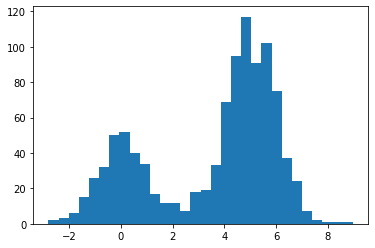

In [ ]:
plt.hist(x, bins=30)
plt.show()

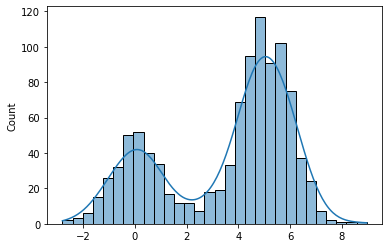

In [ ]:
sns.histplot(x,bins=30,kde=True)

Sea $[a,b]$ el rango del dataset, entonces los rangos en los que se define el histograma de n bines son

- $[a,a+(b-a)/n)\rightarrow f_1$
- $[(b-a)/n,2(b-a)/n)\rightarrow f_2$
- $\cdots$
- $[(n-1)(b-a)/n,b]\rightarrow f_n$

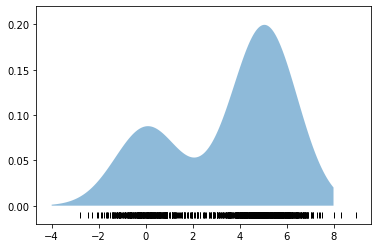

In [ ]:
x_d = np.linspace(-4, 8, 2000)

# instanciamos y entrenamos el modelo
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples devuelve el logaritmo de la densidad de probabilidad
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5) # Gráfica del modelo 
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1) # Gráfica del conjunto de datos
plt.ylim(-0.02, 0.22);

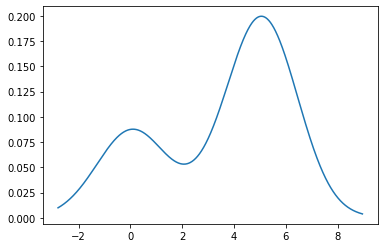

In [ ]:
x_pred = np.linspace(x.min(),x.max(),1000)
logprob = kde.score_samples(x_pred[:, None])
plt.plot(x_pred,np.exp(logprob))
plt.show()

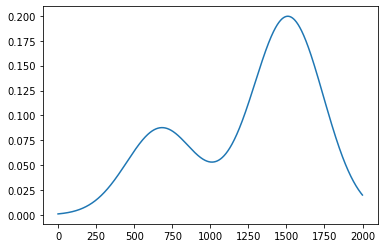

In [ ]:
#plt.hist(x, bins=30)
plt.plot(np.exp(logprob))
plt.show()

## Ancho de banda

La selección del ancho de banda es una pieza importante del KDE: **es el hiperparámetro que controla la compensación de sesgo-varianza** en la estimación de la función de densidad: 
- Un ancho de banda demasiado estrecho conduce a una estimación de alta varianza (sobreajuste) donde la presencia o ausencia de un solo punto hace una gran diferencia.
- Un ancho de banda demasiado ancho conduce a una estimación de alto sesgo (subajuste) donde la estructura de los datos es eliminada por el ancho del kernel.

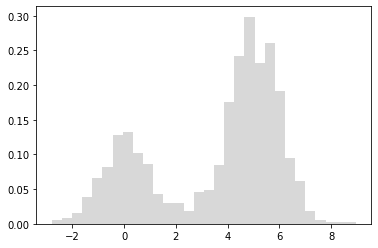

In [ ]:
fig, ax = plt.subplots()
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
plt.show()


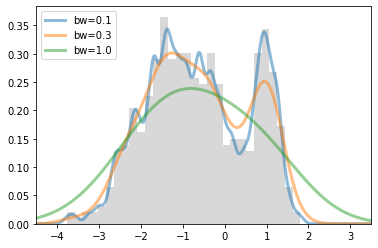

In [ ]:
from scipy.stats.distributions import norm

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis]) # log-normal distribution is the continuous probability distribution of a random variable whose logarithm is normally distributed.
    return np.exp(log_pdf)


# Obteniendo puntos de una distribución bimodal en 1D
np.random.seed(0)
x_grid = np.linspace(-4.5, 3.5, 1000)

x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(-4.5, 3.5)
ax.legend(loc='upper left');

Usar diferentes anchos de banda puede conducir a ideas completamente diferentes de la naturaleza subyacente de los datos. Dada la importancia del ancho de banda, ¿cómo podríamos determinar el ancho de banda óptimo para un problema determinado? En el contexto del ML, hemos visto que tal ajuste de hiperparámetros a menudo se realiza empíricamente mediante validación cruzada. Usaremos GridSearchCV para optimizar el ancho de banda para el conjunto de datos anterior:

In [ ]:
from sklearn.model_selection import GridSearchCV

# valores para evaluar el ancho de banda
grid_param = {'bandwidth': np.linspace(0.1, 1.0, 30)}

grid = GridSearchCV(KernelDensity(kernel='gaussian'), grid_param, cv=20)

grid.fit(x[:, None])

grid.best_estimator_ # Objeto de la clase KernelDensity con el mejor bandwidth

KernelDensity(algorithm='auto', atol=0, bandwidth=0.19310344827586207,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

Según el puntaje de validación cruzada (es decir, la probabilidad máxima), el mejor ancho de banda es de alrededor de 0.19:

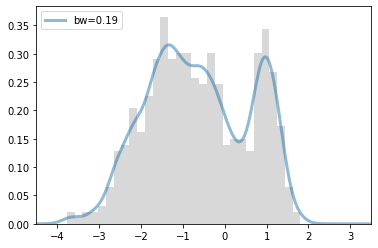

In [ ]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(-4.5, 3.5);

Vemos que la validación cruzada produce un ancho de banda que está cerca de lo que podríamos elegir a simple vista, y la estimación de densidad resultante refleja estrechamente la distribución de los datos subyacentes.

## Kernels

Hemos estado usando el kernel gaussiano, pero esta no es la única opción disponible. KDE se puede usar con cualquier función de [kernel](https://scikit-learn.org/stable/modules/density.html), y diferentes kernels conducen a estimaciones de densidad con diferentes características. Realicemos una visualización rápida de los seis kernels disponibles en Scikit-learn:

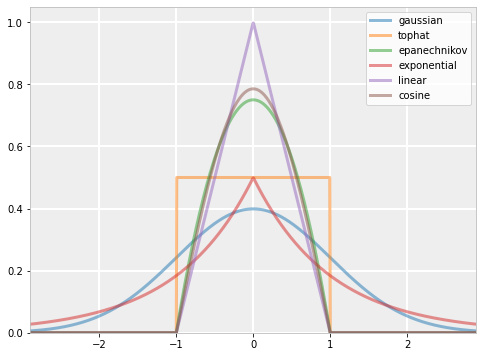

In [ ]:
#@title Tipos de kernel:
def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()
    
plot_kernels()

##Dependencia del Kernel

Para puntos lejanos, algunos kernels tienen pesos mucho más cercanos a cero que otros: en el caso de los kernels con límites "fuertes" (como el kernel tophat), los puntos distantes contribuyen exactamente con cero a la densidad. 

En el extremo opuesto, para los puntos que están muy cerca en comparación con el tamaño del kernel, los kernels que son muy "planos" (por ejemplo, kernel tophat) permitirán considerar grupos enteros de puntos a la vez, mientras que los núcleos que son menos planos (por ejemplo, el kernel gaussiano o exponencial) no admitirá tales eficiencias.

Podemos ver este comportamiento en la siguiente figura:

<p><img alt="Colaboratory logo" height="350px" src="https://i.imgur.com/wiH8jsx.png" align="left" hspace="10px" vspace="0px"></p>

Observe las dos regiones de interés: para anchos de banda muy pequeños, los kernels con un corte fuerte (tophat, lineal) superan a los kernels con un cono amplio (gaussiano, exponencial). Y los kernels cónicos que caen más rápidamente (gaussiano) se calculan de manera más eficiente que los kernels que caen más lentamente (exponencial).

En el otro extremo, los kernels con perfiles muy planos cerca de cero (tophat, gaussiano) muestran una mejora para anchos de banda grandes, mientras que los kernels con perfiles muy empinados cerca de cero (lineal, exponencial) no muestran ninguna mejora

## Ejemplo

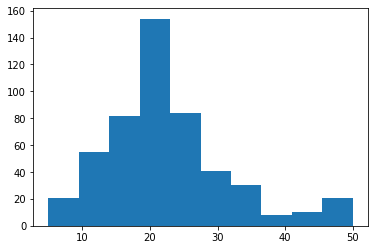

In [ ]:
#Conjunto de datos al que voy a calcular el KDE
#Producido por random np.random.(distribución)
#Cargar un csv y elegir un conjunto de datos
plt.hist(y)
plt.show()

In [ ]:
y.shape, y[:, None].shape

((506,), (506, 1))

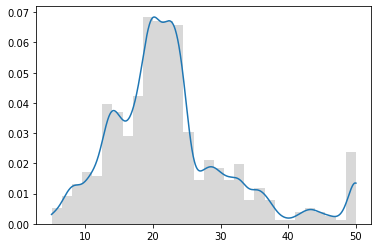

In [ ]:
#Buscar el ancho de banda adecuado

from sklearn.model_selection import GridSearchCV

# valores para evaluar el ancho de banda
grid_param = {'bandwidth': np.linspace(0.001, 1, 30)}

#Ejecutamos la busqueda por GridSearch
grid = GridSearchCV(KernelDensity(kernel='gaussian'), grid_param, cv=4)

#Entrenamos todos esos modelos posible
y_pred = np.linspace(y.min(),y.max(),1000)
grid.fit(y[:, None])

#Seleccionamos el mejor
kde = grid.best_estimator_ # Objeto de la clase KernelDensity con el mejor bandwidth
pdf = np.exp(kde.score_samples(y_pred[:, None]))
plt.plot(y_pred, pdf)
plt.hist(y, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
plt.show()


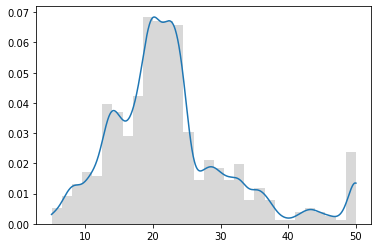

In [ ]:
modelador = KernelDensity(kernel='gaussian',bandwidth=0.03)
modelador.fit(y[:,None])
pdf = np.exp(kde.score_samples(y_pred[:, None]))
plt.plot(y_pred, pdf)
plt.hist(y, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
plt.show()

#**Análisis de Componentes Principales (Principal Comptents Analysis)**


PCA es un método que consiste en rotar el dataset de tal forma que las componentes rotadas son estadisticamente no-correlacionadas. Si se desea también reducir la dimensionalidad, esta rotación es seguida de una selección de un subconjunto de características de acuerdo con su importancia.

## Intuición inicial
Tenemos los siguientes datos 2D y nos gustaría encontrar una proyección en 1D que preserve la máxima cantidad de variabilidad.

In [ ]:
!pip install mglearn
import mglearn

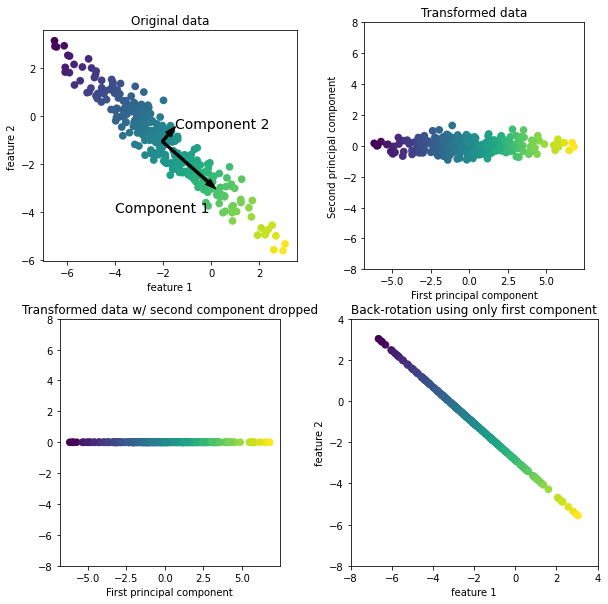

In [ ]:
mglearn.plots.plot_pca_illustration()

## Intuición práctica

(200, 2)


Text(0, 0.5, 'Y')

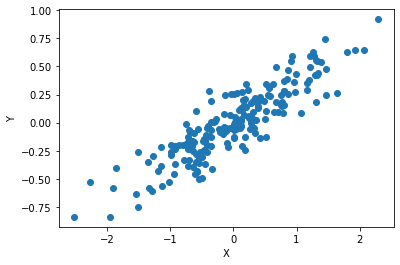

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T+10

X = X-np.mean(X, axis=0)
print (X.shape)
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X")
plt.ylabel("Y")

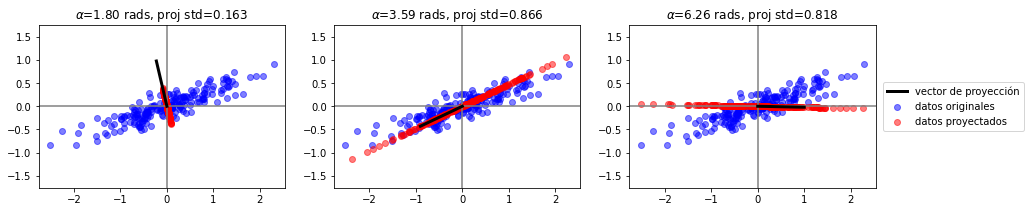

In [ ]:
#@title Inspección de ángulos aleatorios
plt.figure(figsize=(15,3))

unit_vector = lambda angle: np.array([np.cos(angle), np.sin(angle)])

for i in range(3):
    plt.subplot(1,3,i+1)
    angle = np.random.random()*np.pi*2 if i!=0 else 1.8
    v = unit_vector(angle)

    c = X.dot(v.reshape(-1,1))/(np.linalg.norm(v)**2)
    Xp = np.repeat(v.reshape(-1,2),len(X),axis=0)*c

    plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="datos originales")
    plt.scatter(Xp[:,0], Xp[:,1], color="red", alpha=.5, label="datos proyectados")
    plt.axvline(0, color="gray")
    plt.axhline(0, color="gray")
    plt.plot([0,v[0]], [0,v[1]], color="black", lw=3, label="vector de proyección")
    plt.axis('equal')
    plt.ylim(-2,2)
    plt.title("$\\alpha$=%.2f rads, proj std=%.3f"%(angle, np.std(c)))
    if i==2:
        plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

Implementemos PCA y veamos los resultados que obtenemos para dos y una componente.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X.shape

(200, 2)

In [ ]:
pca2 = PCA(n_components=2) 
pca2.fit(X)
print("Componentes")
print(pca2.components_)
print("Norma de las componentes")
print(pca2.explained_variance_)

Componentes
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Norma de las componentes
[0.7625315 0.0184779]


In [ ]:
sum(pca2.explained_variance_)

0.7810093963961741

In [ ]:
pca = PCA(n_components=1) 
pca.fit(X)
print("Componentes")
print(pca.components_)
print("Norma de las componentes")
print(pca.explained_variance_)

Componentes
[[-0.94446029 -0.32862557]]
Norma de las componentes
[0.7625315]


Las componentes principales corresponden a las direcciones en los datos originales, por lo tanto son combinaciones de las características originales. Cada fila en `components_` corresponde a una componente principal y se organizan dependiendo de su importancia. Asímismo, cada columna corresponde a cada una de las caraterísticas originales. Las entradas de `explained_variance_` corresponden a la norma de los vectores de las componentes principales, los cuales indican que tan "importante" es el respectivo eje en la descripción de la distribución de los datos. 


Veamos ahora como quedan nuestros datos transformados.

In [ ]:
Xt = pca.transform(X)
X.shape,pca.transform(X).shape,pca2.transform(X).shape

((200, 2), (200, 1), (200, 2))

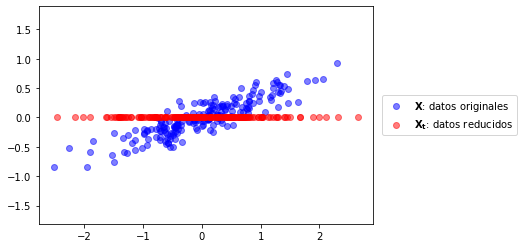

In [ ]:
Xt = pca.transform(X)
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="$\mathbf{X}$: datos originales")
plt.scatter(Xt, [0]*len(Xt), color="red", alpha=.5, label="$\mathbf{X_t}$: datos reducidos")
plt.axis("equal");
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5));

y podemos también reconstruir los datos 2D después de la transformación

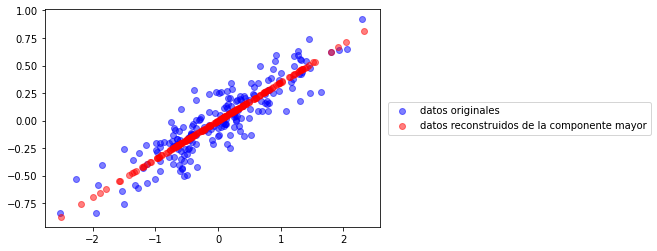

In [ ]:
Xr = pca.inverse_transform(Xt)
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="datos originales")
plt.scatter(Xr[:,0], Xr[:,1], color="red", alpha=.5, label="datos reconstruidos de la componente mayor")
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5));

## Usando PCA para visualizar datos multidimensionales

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

In [ ]:
# cargamos los datos y los estandarizamos
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# aplicamos PCA con dos componentes principales
pca = PCA(n_components=2)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Forma original: {}".format(str(X_scaled.shape)))
print("Forma reducida: {}".format(str(X_pca.shape)))

Forma original: (569, 30)
Forma reducida: (569, 2)


Text(0, 0.5, 'PCA2')

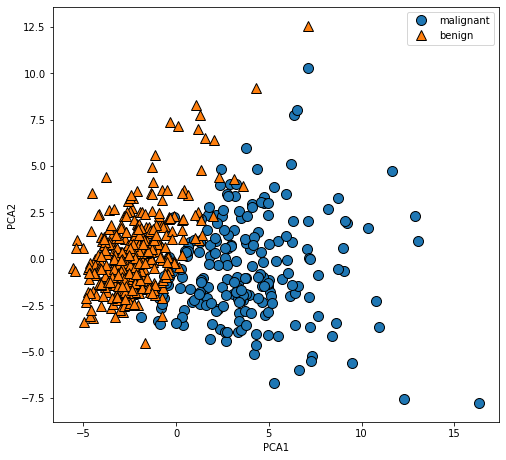

In [ ]:
# graficamos en el espacio de las componentes
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

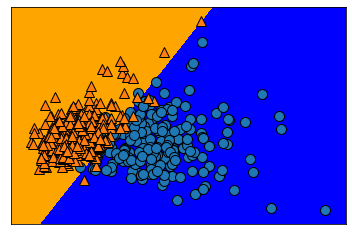

In [ ]:
# entrenamos un regresor LG
clf = LogisticRegression(solver="liblinear")
clf.fit(X_pca,cancer.target)

mglearn.plots.plot_2d_classification(clf,X_pca,fill=True, cm=ListedColormap(['blue','orange']))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.show();

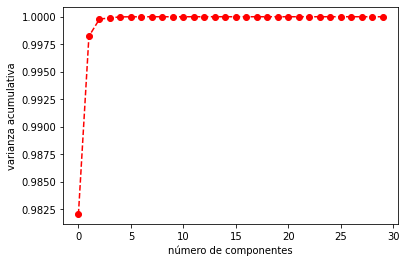

In [ ]:
pca = PCA().fit(cancer.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro--')
plt.xlabel('número de componentes')
plt.ylabel('varianza acumulativa');

La curva cuantifica cuánto de la varianza total está contenida en las primeras N componentes. Observamos que, en este caso, las dos primeras componentes contienen alrededor del 99% de la varianza, y se necesitan alrededor de tres componentes para describir cerca del 100% de la varianza. 

Aternativamente, el hiperparámetro `n_components` puede ser usado en el rango (0,1), con lo cual se indica al modelo que contenga un cierto porcentaje de la varianza, y el modelo nos devolverá el número de componentes necesarias para tener ese porcentaje de varianza:  

In [ ]:
# reteniendo el 50 % de la varianza
pca = PCA(n_components=0.99).fit(cancer.data)
print("Número de componentes: ",pca.n_components_)

Número de componentes:  2


Podemos concluir entonces que para este dataset, haber tomado solo dos componentes principales permite visualizar que la separación de los datos es lineal sin perder calidad en los resultados.

## Ejemplo

In [ ]:
# load_extended_boston
X, y = mglearn.datasets.load_extended_boston()
X.shape, y.shape

((506, 104), (506,))

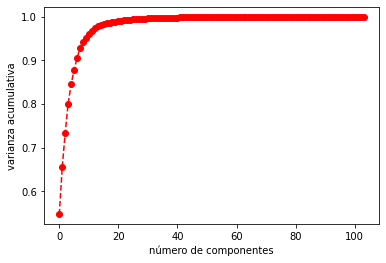

In [ ]:
pca = PCA().fit(X) 
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro--')
plt.xlabel('número de componentes')
plt.ylabel('varianza acumulativa');

In [ ]:
pca = PCA(n_components=0.99).fit(X)
print("Número de componentes: ",pca.n_components_)

Número de componentes:  21


In [ ]:
Xtransform = pca.transform(X)
Xtransform.shape

(506, 21)

In [ ]:
#Primero el split de los datos
X_train, X_test, y_train, y_test = train_test_split(Xtransform, y, random_state=0)

In [ ]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
for m in models:
  m.fit(X_train,y_train)

labels = ['Regresión linear', 'Regresión Ridge alpha=1', 'Regresión Lasso alpha=1','Regresión ElasticNet alpha=1,rho=0.5']
for i,m in enumerate(models):
  print('Model', labels[i])
  print("Score train:", m.score(X_train, y_train))
  print("Score test:",m.score(X_test, y_test))
  y_pred = m.predict(X_test)
  print("MAE",metrics.mean_absolute_error(y_test,y_pred)/y_test.mean())
  print("RMSE:", metrics.mean_squared_error(y_test,y_pred)/y_test.mean())
  print()

Model Regresión linear
Score train: 0.8580655259715146
Score test: 0.7176861516705884
MAE 0.1469684621486039
RMSE: 1.0340022445322399

Model Regresión Ridge alpha=1
Score train: 0.8491575352910398
Score test: 0.7177878294833453
MAE 0.1447973008395364
RMSE: 1.0336298395395975

Model Regresión Lasso alpha=1
Score train: 0.4984305424030617
Score test: 0.3193098382580234
MAE 0.23463159154241187
RMSE: 2.4930946860635848

Model Regresión ElasticNet alpha=1,rho=0.5
Score train: 0.43170774953604985
Score test: 0.26870272146516627
MAE 0.2411034888873479
RMSE: 2.6784482302229278



In [ ]:
#X_extra ---> predecir 104 columnas 
#X_extra_t = pca.transform(X_extra) ---> 21
#y_pred = m.predict(X_extra_t)

## Ejercicios propuestos

In [ ]:
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

# **Manejo de series de tiempo en Pandas**

Las series de tiempo se identifican por ser un conjunto de eventos que depende del tiempo, existen bajo una ventana o intervalo temporal y con una frecuencia específica que los hace continuos. Si bien podemos tener una columna de tipo fecha, el tener estas como un **Index** hace que nuestro `DataFrame` se vuelva una serie de tiempo en forma.  

In [ ]:
import pandas as pd
from datetime import datetime #--> el módulo estandas para el manejo de tiempos en python

In [ ]:
datetime.today() #Objeto Fecha/Tiempo en la máquina que usamos

datetime.datetime(2020, 11, 26, 23, 26, 47, 34398)

## Tipos de objetos de Fecha/Tiempo (datetime)

* Timestamp: Marca de tiempo
```python
pd.Timestamp(datetime(2020,1,1))
pd.Timestamp('2020-01-01')
```

In [ ]:
year_2020 = pd.Timestamp('2020-11-26')

In [ ]:
year_2020.

Timestamp('2020-11-26 00:00:00')

In [ ]:
year_2020.year, year_2020.day_name()

(2020, 'Thursday')

* Period: Periodo de tiempo con una frecuencia 
```python
pd.Period('2020-01')
```

|Periodo| Alias|
|-|-|
|Horas|H|
|Diario|D|
|Semanal|W|
|Mes|M|
|Trimestre|Q|
|Anual|A|




In [ ]:
p_month = pd.Period('2020-07') #default M 
p_day =p_month.asfreq('D')

In [ ]:
p_month

Period('2020-07', 'M')

In [ ]:
p_day

Period('2020-07-31', 'D')

In [ ]:
month.to_timestamp() #.to_period('M')

Timestamp('2020-07-01 00:00:00')

In [ ]:
month + 2

Period('2020-09', 'M')

* DatetimeIndex:

```python
pd.date_range(start='2020-01-01',periods=6, freq='M')
```

In [ ]:
range_2020 = pd.date_range(start='2020-01-01',periods=12, freq='M')

In [ ]:
type(range_2020)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
range_2020

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

* PeriodIndex:

In [ ]:
range_2020.to_period()

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', freq='M')

## Dataframe con index tipo fecha

In [ ]:
pd.DataFrame(np.random.random((12,3)), index = range_2020)

,0,1,2
2020-01-31,0.019277,0.037095,0.998961
2020-02-29,0.636231,0.102258,0.135807
2020-03-31,0.832143,0.536505,0.983828
2020-04-30,0.758916,0.865499,0.918020
2020-05-31,0.630620,0.334977,0.134777
2020-06-30,0.650358,0.413382,0.967593
2020-07-31,0.974856,0.635531,0.917371
2020-08-31,0.624495,0.340591,0.312278
2020-09-30,0.529474,0.195496,0.788908
2020-10-31,0.410549,0.944214,0.645993


In [ ]:
pd.DataFrame(np.random.random((12,3)), index = range_2020).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-01-31 to 2020-12-31
Freq: M
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
 2   2       12 non-null     float64
dtypes: float64(3)
memory usage: 384.0 bytes


In [ ]:
#API SOCRATA, un link a una base viva (actualizada en tiempo real)
path = 'https://www.datos.gov.co/resource/32sa-8pi3.json?$limit=10000'
TMR = pd.read_json(path)

In [ ]:
TMR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6976 entries, 0 to 6975
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valor          6976 non-null   float64
 1   unidad         6976 non-null   object 
 2   vigenciadesde  6976 non-null   object 
 3   vigenciahasta  6976 non-null   object 
dtypes: float64(1), object(3)
memory usage: 218.1+ KB


In [ ]:
#########
#pd.read_csv(path, parse_dates=[1,2,3] (es la columnas que quiero leer como fecha),
#            date_parser=func (función particular para leer la fecha))
#########

In [ ]:
TMR.head()

,valor,unidad,vigenciadesde,vigenciahasta
0,3842.34,COP,2020-10-02T00:00:00.000,2020-10-02T00:00:00.000
1,3865.47,COP,2020-10-01T00:00:00.000,2020-10-01T00:00:00.000
2,3878.94,COP,2020-09-30T00:00:00.000,2020-09-30T00:00:00.000
3,3859.90,COP,2020-09-29T00:00:00.000,2020-09-29T00:00:00.000
4,3867.81,COP,2020-09-26T00:00:00.000,2020-09-28T00:00:00.000


### Manejo de Errores 

In [ ]:
test_TMR = TMR.copy()
test_TMR.iloc[5,2] = 'Cadena'
test_TMR.head(10)

,valor,unidad,vigenciadesde,vigenciahasta
0,3842.34,COP,2020-10-02T00:00:00.000,2020-10-02T00:00:00.000
1,3865.47,COP,2020-10-01T00:00:00.000,2020-10-01T00:00:00.000
2,3878.94,COP,2020-09-30T00:00:00.000,2020-09-30T00:00:00.000
3,3859.90,COP,2020-09-29T00:00:00.000,2020-09-29T00:00:00.000
4,3867.81,COP,2020-09-26T00:00:00.000,2020-09-28T00:00:00.000
5,3873.80,COP,Cadena,2020-09-25T00:00:00.000
6,3863.60,COP,2020-09-24T00:00:00.000,2020-09-24T00:00:00.000
7,3813.30,COP,2020-09-23T00:00:00.000,2020-09-23T00:00:00.000
8,3790.54,COP,2020-09-22T00:00:00.000,2020-09-22T00:00:00.000
9,3725.37,COP,2020-09-19T00:00:00.000,2020-09-21T00:00:00.000


In [ ]:
try: 
  test_TMR['vigenciadesde'] = pd.to_datetime(test_TMR['vigenciadesde'])
except Exception as err:
  print(err)

Unknown string format: Cadena


In [ ]:
values_unique = test_TMR.vigenciadesde.unique()
error = [values for values in values_unique if not values.startswith('2') and not values.startswith('1')]

In [ ]:
test_TMR = test_TMR.replace(error,np.nan)
test_TMR.head(10)

,valor,unidad,vigenciadesde,vigenciahasta
0,3842.34,COP,2020-10-02T00:00:00.000,2020-10-02T00:00:00.000
1,3865.47,COP,2020-10-01T00:00:00.000,2020-10-01T00:00:00.000
2,3878.94,COP,2020-09-30T00:00:00.000,2020-09-30T00:00:00.000
3,3859.90,COP,2020-09-29T00:00:00.000,2020-09-29T00:00:00.000
4,3867.81,COP,2020-09-26T00:00:00.000,2020-09-28T00:00:00.000
5,3873.80,COP,NaN,2020-09-25T00:00:00.000
6,3863.60,COP,2020-09-24T00:00:00.000,2020-09-24T00:00:00.000
7,3813.30,COP,2020-09-23T00:00:00.000,2020-09-23T00:00:00.000
8,3790.54,COP,2020-09-22T00:00:00.000,2020-09-22T00:00:00.000
9,3725.37,COP,2020-09-19T00:00:00.000,2020-09-21T00:00:00.000


In [ ]:
test_TMR['vigenciadesde'] = pd.to_datetime(test_TMR['vigenciadesde'])

### Gráficas de series de tiempo

In [ ]:
TMR['vigenciadesde'] = pd.to_datetime(TMR['vigenciadesde'])
#Pueden haber errores 
TMR.set_index(TMR['vigenciadesde'], inplace=True)

In [ ]:
TMR = TMR[['valor','vigenciahasta']]

[]

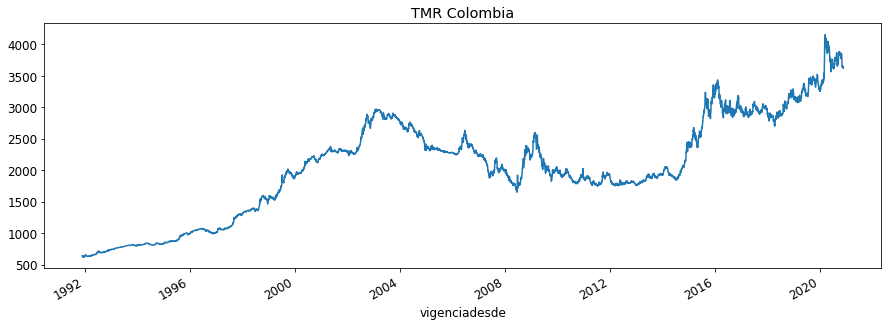

In [ ]:
TMR.valor.plot(title='TMR Colombia', figsize=(15,5))
plt.plot()

## Indexado con fechas

In [ ]:
TMR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6976 entries, 2020-10-02 to 2020-05-22
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valor          6976 non-null   float64
 1   vigenciahasta  6976 non-null   object 
dtypes: float64(1), object(1)
memory usage: 163.5+ KB


In [ ]:
#TMR['2015-01'] <-- puede ser confuso
TMR.loc['2015'].head() 

,valor,vigenciahasta
vigenciadesde,,
2015-01-03,2383.37,2015-01-05T00:00:00.000
2015-01-06,2412.82,2015-01-06T00:00:00.000
2015-01-07,2452.11,2015-01-07T00:00:00.000
2015-01-08,2434.31,2015-01-08T00:00:00.000
2015-01-09,2405.03,2015-01-09T00:00:00.000


In [ ]:
interval = TMR.loc['2015-03':'2015-06']
interval.head()

,valor,vigenciahasta
vigenciadesde,,
2015-03-03,2522.03,2015-03-03T00:00:00.000
2015-03-04,2555.08,2015-03-04T00:00:00.000
2015-03-05,2565.90,2015-03-05T00:00:00.000
2015-03-06,2543.47,2015-03-06T00:00:00.000
2015-03-07,2565.61,2015-03-09T00:00:00.000


## Asignar frecuencias

In [ ]:
index = pd.date_range('2020-1-1', periods=2, freq='M')
index_period = index.to_period()

In [ ]:
series = pd.Series([0.0, 2.0], index=index)
df = pd.DataFrame({'s':series})

series_period = pd.Series([0.0, 2.0], index=index_period)
df_period = pd.DataFrame({'s':series_period})

In [ ]:
new_df = df.asfreq(freq='D') # df.asfreq(freq='30S', fill_value=9.0)
new_df.shape

(30, 1)

In [ ]:
new_df_period = df_period.asfreq(freq='D')
new_df_period.shape

(2, 1)

In [ ]:
index_period

PeriodIndex(['2020-01', '2020-02'], dtype='period[M]', freq='M')

In [ ]:
index_period.asfreq('W')

PeriodIndex(['2020-01-27/2020-02-02', '2020-02-24/2020-03-01'], dtype='period[W-SUN]', freq='W-SUN')

In [ ]:
new_df.head()

,s
2020-01-31 00:00:00,0.0
2020-01-31 00:00:30,NaN
2020-01-31 00:01:00,NaN
2020-01-31 00:01:30,NaN
2020-01-31 00:02:00,NaN


In [ ]:
df.asfreq(freq='D', fill_value=9.0).head()

,s
2020-01-31,0.0
2020-02-01,9.0
2020-02-02,9.0
2020-02-03,9.0
2020-02-04,9.0


In [ ]:
df_cols  = pd.DataFrame(np.random.random((2,2)), index=index,columns=['A','B'])
df_cols

,A,B
2020-01-31,0.766698,0.082448
2020-02-29,0.921140,0.420431


In [ ]:
df_cols.asfreq('D',method='ffill').head()

,A,B
2020-01-31,0.766698,0.082448
2020-02-01,0.766698,0.082448
2020-02-02,0.766698,0.082448
2020-02-03,0.766698,0.082448
2020-02-04,0.766698,0.082448


In [ ]:
#values = {'A':df_cols.A.mean(), 'B':df_cols.B.mean()}
values = {k:df_cols[k].mean() for k in df_cols.columns.values}
df_cols.asfreq('D').fillna(values)

,A,B
2020-01-31,0.766698,0.082448
2020-02-01,0.843919,0.251440
2020-02-02,0.843919,0.251440
2020-02-03,0.843919,0.251440
2020-02-04,0.843919,0.251440
2020-02-05,0.843919,0.251440
2020-02-06,0.843919,0.251440
2020-02-07,0.843919,0.251440
2020-02-08,0.843919,0.251440
2020-02-09,0.843919,0.251440


##Media móvil 

In [ ]:
TMR_zone = TMR.loc['2014':'2015']

In [ ]:
means_TMR = TMR_zone.rolling(window=30, min_periods=1).mean()

In [ ]:
TMR_zone.head()

,valor,vigenciahasta
vigenciadesde,,
2014-03-15,2044.58,2014-03-17T00:00:00.000
2014-03-18,2035.16,2014-03-18T00:00:00.000
2014-03-19,2034.86,2014-03-19T00:00:00.000
2014-03-20,2017.38,2014-03-20T00:00:00.000
2014-03-21,1998.60,2014-03-21T00:00:00.000


In [ ]:
means_TMR.head()

,valor
vigenciadesde,
2014-03-15,2044.580
2014-03-18,2039.870
2014-03-19,2038.200
2014-03-20,2032.995
2014-03-21,2026.116


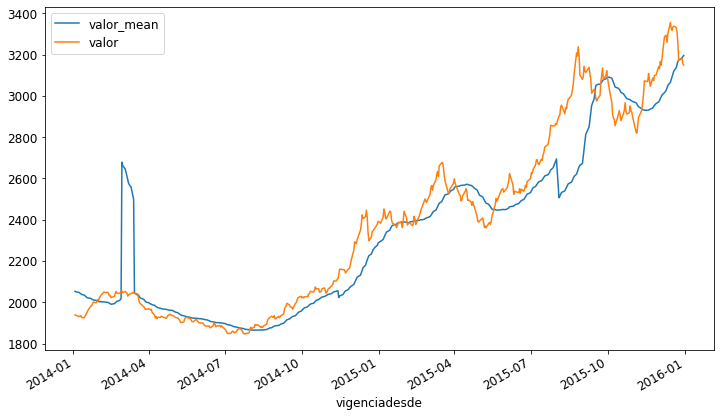

In [ ]:
fig, ax = plt.subplots()
means_TMR.plot(figsize=(12,7),ax=ax)
TMR_zone.plot(figsize=(12,7),ax=ax)
ax.legend(['valor_mean','valor'])

In [ ]:
ewm_TMR = TMR_zone.ewm(span=365,adjust=True).mean()

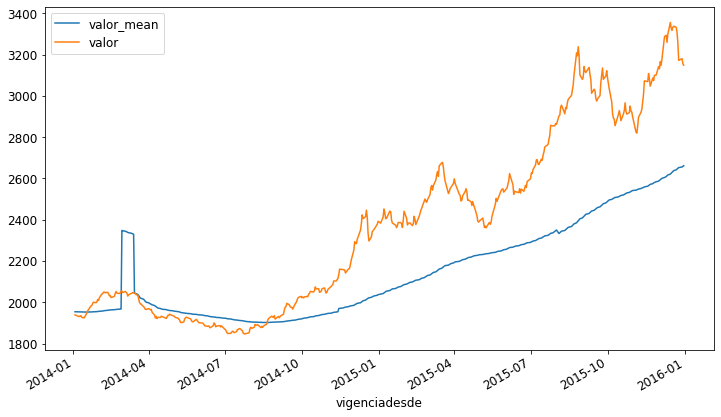

In [ ]:
fig, ax = plt.subplots()
ewm_TMR.plot(figsize=(12,7),ax=ax)
TMR_zone.plot(figsize=(12,7),ax=ax)
ax.legend(['valor_mean','valor'])

## Autocorrelación 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


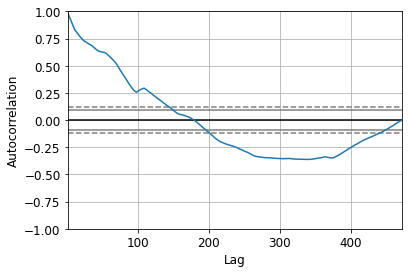

In [ ]:
autocorrelation_plot(TMR_zone.valor)

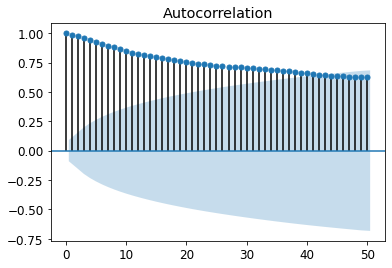

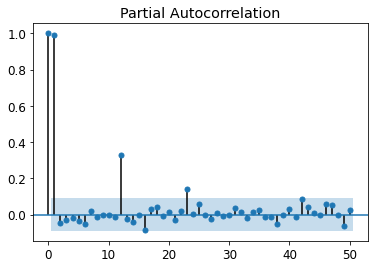

In [ ]:
plot_acf(TMR_zone.valor,lags=50)   
plot_pacf(TMR_zone.valor, lags=50) 
plt.show()